<h1>Table of Contents -- PLEASE CHECK THAT ALL LINKS WORK BEFORE SUBMITTING --<span class="tocSkip"></span></h1> 
<div class="toc"><ul class="toc-item"><li><span><a href="#Relevant-Imports" data-toc-modified-id="Relevant-Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Relevant Imports</a></span></li><li><span><a href="#Read-the-Data" data-toc-modified-id="Read-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the Data</a></span></li><li><span><a href="#Data-Description:" data-toc-modified-id="Data-Description:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Description:</a></span></li><li><span><a href="#Data-Distribution:" data-toc-modified-id="Data-Distribution:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Distribution:</a></span><ul class="toc-item"><li><span><a href="#Continuous-Data-:" data-toc-modified-id="Continuous-Data-:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Continuous Data :</a></span><ul class="toc-item"><li><span><a href="#Tenure:" data-toc-modified-id="Tenure:-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Tenure:</a></span></li><li><span><a href="#Monthly-Charges:" data-toc-modified-id="Monthly-Charges:-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Monthly Charges:</a></span></li><li><span><a href="#Total-Charges:" data-toc-modified-id="Total-Charges:-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Total Charges:</a></span></li></ul></li><li><span><a href="#Categorical-Data:" data-toc-modified-id="Categorical-Data:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Categorical Data:</a></span><ul class="toc-item"><li><span><a href="#Bar-plots:" data-toc-modified-id="Bar-plots:-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Bar plots:</a></span></li><li><span><a href="#Pie-Charts" data-toc-modified-id="Pie-Charts-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Pie Charts</a></span></li></ul></li></ul></li></ul></div>

**Sami notes from lecture :**

Continuous variables : Use histograms to plot the distributions of different variables. **OK**

Averages (medians, means ... ),dispersion , variance, symmetry **OK**

Outliers : Are they possible, what do we need to do with them? Should we keep them or not ? **TO BE DONE**

Categorical variables : pie charts , bar charts **OK**

Bivariate analysis (depends on the type) : 
Correlation for continuous
contingency table and chi square test for categorical

Categorical and continuous : Anova, t-test ...


Multivariate Analysis:

**Fifi notes from lecture :**
- Plot distribution of features using histograms (for continous variables) : where's the average? how much dispersion we have? calculated with variance,symmetry, assymetry, 
- Look at outliers, are they possible, what do we need to do with them? Should we keep them or not ?
- Categorical variables : pie charts, bar charts, mode(most used variable)
- Cross variables to show relation between features, continous : correlation for continous, categorical : chi square, contingency table, if both : anova, T-test
- Multivariate analysis : (bivariate statistics)

**Zeineb remarks :**
- Il existe pas de correlation entre des varibles categorical (noté plus bas)
- Dans l'enoncé on dit: He’s specially interested in the lifetime value of loyal customers. Thus, you can ignore (for now) those who leave the company (churn). -> pour moi il faut depuis le debut enlever tout les customers qui ont Churn='1' et faire l'analyse des clients qui n'ont pas churn seulement. J'ai pas voulu tout changer en attendant de voir un 2eme/3eme avis
- Je prefere les pie charts du coup j'ai changé ca pour les categorical variables :))


# Relevant Imports

In [71]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Read the Data

In [72]:
path = './Data/Telco-Customer-Churn.csv'
data = pd.read_csv(path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Description:

In [73]:
for column in data.columns:
    print(column,data[column].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

**As we can see above, most of the features are categorical, most of the time containing only two or three possible values. The only features that are not categorical are : CustomerID, Monthly charges, Total charges and Tenure.
We will start our analysis by looking at these continuous features and then look at categorical ones.**

# Data Distribution:
For this assignment, we will focus only on loyal customers, meaning that we will keep only clients who have no in label churn.

In [74]:
data = data[data['Churn']=='No']

## Continuous Data :

### Tenure: 
This feature represents the number of months the customer has stayed with the company

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64


Text(0.5,0,'Tenure')

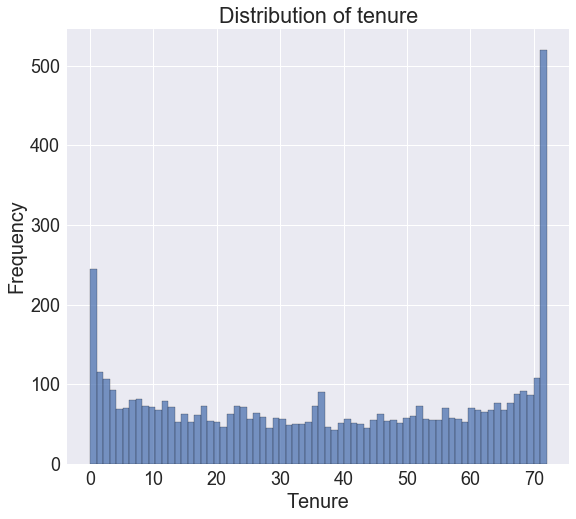

In [75]:
print(data['tenure'].describe())
plt.figure(figsize=(9, 8))
plt.hist(data['tenure'], bins=70, alpha=0.75, edgecolor='black')
plt.title('Distribution of tenure')
plt.ylabel('Frequency')
plt.xlabel('Tenure')

**We can see that the Telco company has a very large number of new clients (25% of the customers have subscribed since less than 1year and 3months ago) but also a very large number of "old" clients (25% of the customers have been with the company for more than 5years)**

**The outliers here make sence: We can then say that the company is doing good in attracting new customers but also in keeping the old ones**

**This small analysis also tells us that this study have been conducted for a period of 72/12 = 6 years, since it is the highest value of tenure**

### Monthly Charges:
This feature represents the amount charged to the customer monthly

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64


Text(0.5,0,'MonthlyCharges')

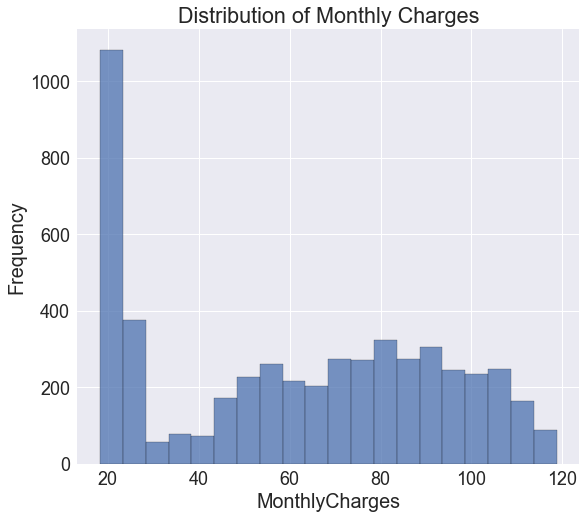

In [76]:
print(data['MonthlyCharges'].describe())
plt.figure(figsize=(9, 8))
plt.hist(data['MonthlyCharges'], bins=20, alpha=0.75, edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.ylabel('Frequency')
plt.xlabel('MonthlyCharges')

**As we can see, the plot here is skewed to the left which means that most clients have low monthly charges.**

### Total Charges:

This features represents the total amount charged to the customer. The type of this feature should be float, but we saw in the beginning of the analysis that it is of type string. We will change it to float as it should be.

When inspecting the values of this column we saw that there are many missing entries. We will try to plot the distribution of this feature without these values and then change these missing entries to the median of the column. 

In [77]:
data[data['TotalCharges']==' '].head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


Text(0.5,0,'TotalCharges')

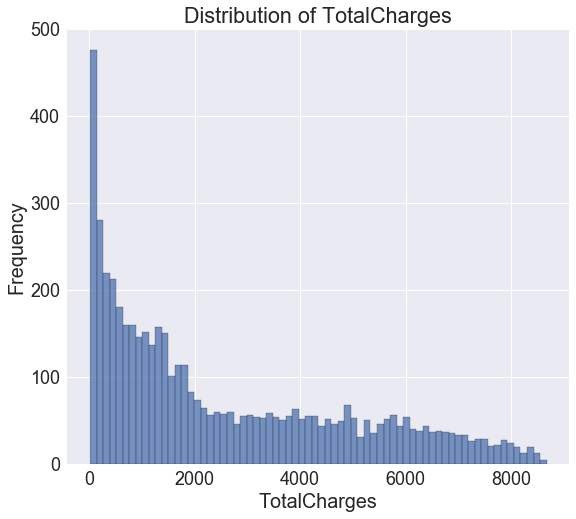

In [78]:
TotalCharges = data['TotalCharges'][data['TotalCharges']!=' '].astype('float')
plt.figure(figsize=(9, 8))
plt.hist(TotalCharges, bins=70, alpha=0.75, edgecolor='black')
plt.title('Distribution of TotalCharges')
plt.ylabel('Frequency')
plt.xlabel('TotalCharges')

In [79]:
len(TotalCharges[TotalCharges<500])/len(TotalCharges)

0.22680612047259346

**We can see that the total charges decay exponentially, meaning that most of the clients pay small charges. Indeed, more than 20% of the clients pay less than 500 euros as total charges**

In [80]:
#Setting the empty strings to the median value of the feature
data['TotalCharges'][data['TotalCharges']==' ']= TotalCharges.median()

#Transforming the feature into float
data['TotalCharges'] = data['TotalCharges'].astype('float')

### Correlation between Total and Monthly Charges :
An idea one can have here is to look at the correlation of monthly and total charges.

In [81]:
data[['TotalCharges','MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.756747
MonthlyCharges,0.756747,1.000000


**The pearson correlation coefficient is equal to 0.75. This confirms our intuition that these two features are highly positively correlated. A person who pays high monthly charges also pays high total charges.**

## Categorical Data:

### Gender :
Whether the customer is a male or a female

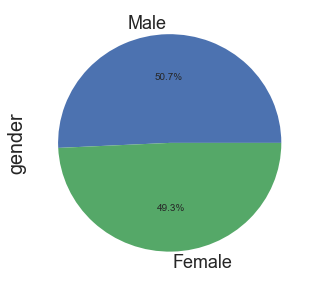

In [82]:
plt.figure(figsize=(5,5))
data["gender"].value_counts().plot(kind='pie',  autopct='%1.1f%%')

**As we can see here, our data set is quite balanced between male and female users.**

### SeniorCitizen
Whether the customer is a senior citizen or not, meaning he is more than 50 years old or not.

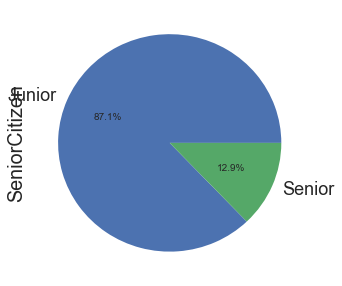

In [83]:
plt.figure(figsize=(5,5))
data["SeniorCitizen"].value_counts().plot(kind='pie', labels = ['Junior', 'Senior'],autopct='%1.1f%%')

**This shows that most of the clients of the data set (approximtely 6/7) are below 50 years old.**

### Partner
Whether the customer has a partner or not (Yes, No)

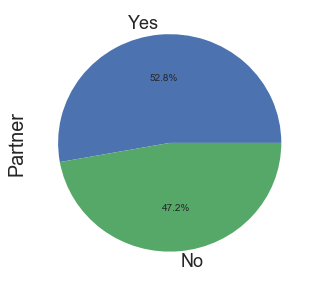

In [84]:
plt.figure(figsize=(5,5))
data["Partner"].value_counts().plot(kind='pie', autopct='%1.1f%%')

**This shows that the dataset is balanced in terms of clients who have partners and clients who don't.**

### Dependents
Whether the customer has dependents or not.

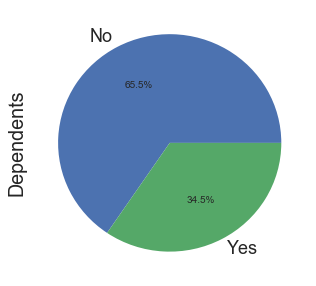

In [85]:
plt.figure(figsize=(5,5))
data["Dependents"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**This shows that most of the clients of the data set don't have dependants. Meaning that most of them have personal phone lines.**

### PhoneService
Whether the customer has a phone service or not (Yes, No)

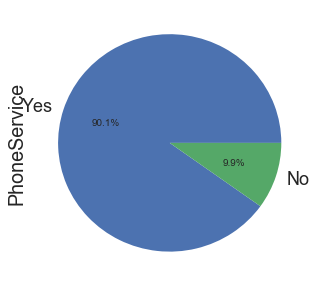

In [86]:
plt.figure(figsize=(5,5))
data["PhoneService"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**As expected from phone company subscriptions, most of the clients (more than 90%) have access to phone lines.**

### MultipleLines
Whether the customer has multiple lines in his subscription or not (Yes, No, No phone service)

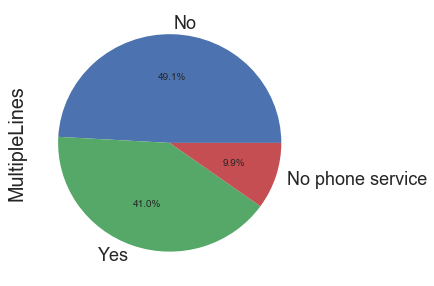

In [87]:
plt.figure(figsize=(5,5))
data["MultipleLines"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**We can see here that almost half the clients who have a phone subscription have multiple lines. So our data set is quiete balanced between single line clients and multiple line ones.**

### InternetService
Customer’s internet service provider (DSL, Fiber optic, No)

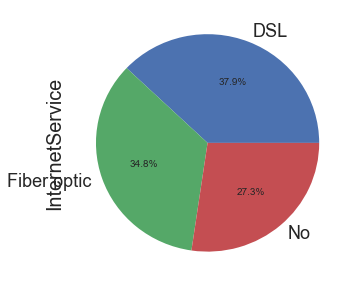

In [88]:
plt.figure(figsize=(5,5))
data["InternetService"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**This distribution shows us the different internet service providers distributions. As we can see, clients are equally divided between optical fiber users and DSL users. We can also note that only 27.3% have no internet subscription, which confirms the importance of internet in a phone subscription.**

### OnlineSecurity
Whether the customer has online security or not (Yes, No, No internet service)

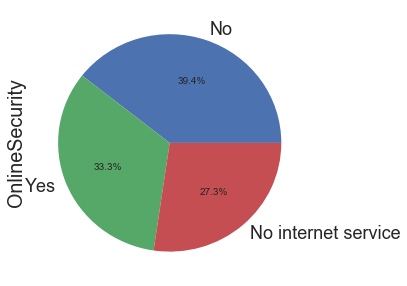

In [89]:
plt.figure(figsize=(5,5))
data["OnlineSecurity"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**This shows that online security is not a must for clients when subscribing in a phone company. As we can see, more than half ot the clients who have internet service, don't use online security.** 

### OnlineBackup
Whether the customer has online backup or not, meaning that a client has a copy of his data stored in the cloud (Yes, No, No internet service).

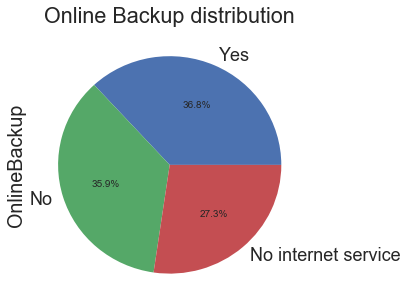

In [90]:
plt.figure(figsize=(5,5))
data["OnlineBackup"].value_counts().plot(kind='pie', title="Online Backup distribution",autopct='%1.1f%%')

**This shows that online back up is not a must feature neither for clients when subscribing in a phone company. As we can see, only half of them have this option activated.**

### DeviceProtection
Whether the customer has device protection or not (Yes, No, No internet service)

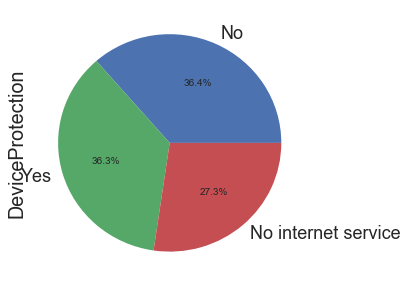

In [91]:
plt.figure(figsize=(5,5))
data["DeviceProtection"].value_counts().plot(kind='pie', autopct='%1.1f%%')

**This shows that device protection is not a very important parameter neither. As we can see, only half of them have this option activated.**

## Correlation between online security, online backup and device protection.
As we saw above, these 3 features seem to have the same distribution. The idea here is to see if they are somehow correlated.

In [92]:
OnlineSecurity=data[data.OnlineSecurity!='No internet service']['OnlineSecurity'].map(dict(Yes=1, No=0)).tolist()

OnlineBackup=data[data.OnlineBackup!='No internet service']['OnlineBackup'].map(dict(Yes=1, No=0)).tolist()

DeviceProtection=data[data.DeviceProtection!='No internet service']['DeviceProtection'].map(dict(Yes=1, No=0)).tolist()

print("p_value between OnlineBackup and OnlineSecurity  "+str(stats.ttest_ind(OnlineBackup,OnlineSecurity)[1]))
print("p_value between DeviceProtection and OnlineSecurity  "+ str(stats.ttest_ind(DeviceProtection,OnlineSecurity)[1]))
print("p_value between DeviceProtection and OnlineBackup  "+ str(stats.ttest_ind(DeviceProtection,OnlineBackup)[1]))

p_value between OnlineBackup and OnlineSecurity  2.6541773547133763e-05
p_value between DeviceProtection and OnlineSecurity  0.00041198094191313825
p_value between DeviceProtection and OnlineBackup  0.5037146595642104


## Fasfouss : You can also add ChiSquare test. Link bellow https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html

### TechSupport
Whether the customer has tech support or not (Yes, No, No internet service)

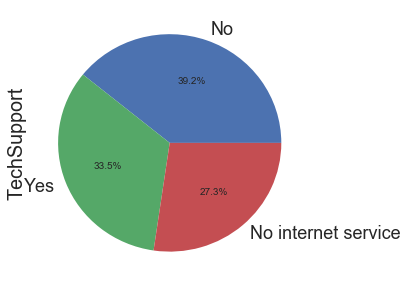

In [94]:
plt.figure(figsize=(5,5))
data["TechSupport"].value_counts().plot(kind='pie',autopct='%1.1f%%')

**We can see here that only a third of clients have technical support, which shows that clients don't care too much about technical support**

### StreamingTV
Whether the customer has streaming TV or not (Yes, No, No internet service)

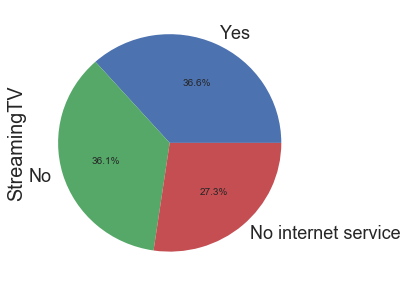

In [95]:
plt.figure(figsize=(5,5))
data["StreamingTV"].value_counts().plot(kind='pie',autopct='%1.1f%%')

***We see here that the distribution is symmetric. Indeed, clients who have internet subscription are equally divided between clients who have streaming TV subscription and clients who don't.***

### StreamingMovies
Whether the customer has streaming movies or not (Yes, No, No internet service)

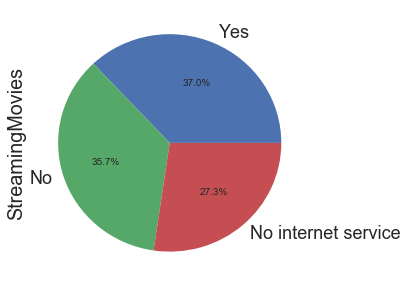

In [96]:
plt.figure(figsize=(5,5))
data["StreamingMovies"].value_counts().plot(kind='pie',autopct='%1.1f%%')

***We see here that the distribution is also symmetric. Indeed, clients who have internet subscription are equally divided between clients who have streaming Movies subscription and clients who don't.***

##  CORRELATION
As we can see the streaming movies and streaming TV have almost the same distribution, which makes us think that client buy these in packs. The idea here is to look at their correlation to confirm this hypothesis.

In [97]:
StreamingTV=data[data.StreamingTV!='No internet service']['OnlineSecurity'].map(dict(Yes=1, No=0)).tolist()

StreamingMovies=data[data.StreamingMovies!='No internet service']['OnlineBackup'].map(dict(Yes=1, No=0)).tolist()

print("p_value between OnlineBackup and OnlineSecurity  "+str(stats.ttest_ind(StreamingMovies,StreamingTV)[1]))


p_value between OnlineBackup and OnlineSecurity  2.6541773547133763e-05


## Fasfouss : You can also add ChiSquare test. Link bellow https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html

### Contract
The contract term of the customer (Month-to-month, One year, Two year)

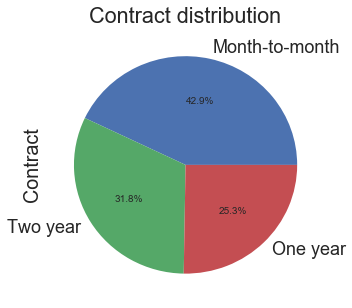

In [99]:
plt.figure(figsize=(5,5))
data["Contract"].value_counts().plot(kind='pie', title="Contract distribution",autopct='%1.1f%%')

**The distribution here of contract types is quiete assymetric. Ideed, 40% of the clients opt for monthly contracts. The other half of them is almost equally divided between clients who have a one-year subscriptions and others who have two-year subscriptions. This shows that clients are more comfortable with monthly contracts rather than commitments of one or two years since short contracts make it easier for them to churn later.**

### PaperlessBilling
Whether the customer has paperless billing or not (Yes, No)

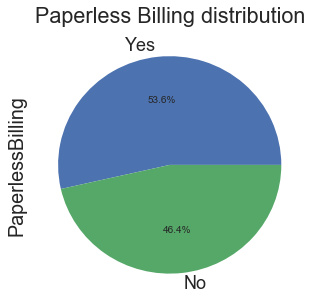

In [100]:
plt.figure(figsize=(5,5))
data["PaperlessBilling"].value_counts().plot(kind='pie', title="Paperless Billing distribution",autopct='%1.1f%%')

**As we can see here, clients are becoming more and more paper independant. More than half of them prefer to receive it digitally rather that in paper formats.**

### PaymentMethod
The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

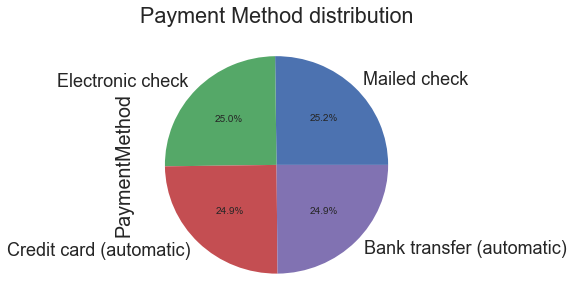

In [101]:
plt.figure(figsize=(5,5))
data["PaymentMethod"].value_counts().plot(kind='pie', title="Payment Method distribution",autopct='%1.1f%%')

**We can see here that the payment methods are equally distributed between electronic check, mailed check, credit card payments and bank transfers.**

### Churn
This is our target variable. Using all the information above, we want to understand the reasons behind a client's churn.